In [ ]:
! Всі команди потрібно виконувати в командному рядку!

##Пакування та дистрибуція

Поширення програмного забезпечення - копіюємо дистрибутив і встановлюємо...

Поширення Python програм, бібліотек, пакунків, модулів:

 - часто це pip install ...

###Мета

користувач повинен мати можливість отримати ваш код

користувач повинен отримати весь код як одни файл

після встановлення код повинен працювати так як потрібно.

###Проєкт

Для пакування потрібен код. Використовуємо проєкт з *realpython*. Копіюємо архів проєкта й розахівовуємо. Переглядаємо структуру проєкта. Основний код знаходиться в теці *src*. Використання окремої теки для коду та саме з такою назвою дискутується, але використовується найчастіше. Тести також в окремій теці. Інші файли це спеціальні файли проєкту для його розповсюдження та пакування.

README.md Markdown файл з інформацією про проєкт.

LICENSE містить ліцензію проєкта.

pyproject.toml описує бекенд збірки та перелічує вимоги до збірки
пакунка

MANIFEST.in список всіх файлів без коду, які потрібно включити дистрибутив.

Можуть ще бути файли:

setup.cfg містить метадані дистрибутиву, додаткові опції та залежності.

setup.py раніше містив інструкції з пакування та залежності; тепер він просто зв'язує все разом у пакунку з кодом.

requirements.txt список залежностей (сторонніх програм, які потрібні для роботи пакунка).

Зараз вже всю цю інформацію вказують у pyproject.toml

###Використання програми

Для використання програми потрібно перейти в теку *src* і спробувати виконати

In [ ]:
!python -m reader

При запуску можуть виникати помилки пов'язані з відсутністю потрібних пакунків, модулів, бібліотек

In [ ]:
!python -m reader 0

При запуску скрипта вказуємо шлях до цього файла та назву файла.

При запуску з *-m* запускаємо на виконання скрипти, модулі та пакунки модулів за іменем модуля, пакунка. Назва пакунка модулів це тека де знаходяться модулі.
Якщо пакунок модулів передбачає його запуск на виконання то при запуску пакунка модулів вказується назва пакунка і буде виконуватися код з модуля `__main__.py`, який знаходиться в цій теці.


Однією з переваг використання *-m* є те, що він дозволяє викликати всі модулі, шляхи до яких є у системних шляхах Python. Наприклад

In [ ]:
!python -m antigravity

###Підготовка проєкта до поширення

Підготовка для створення дистрибутиву

####Назва пакунка

Ім'я має бути змістовним та унікальним.

Ім'я пакунка може відрізнятися імені пакунка в PyPi.

*reader* - ім'я пакунка з яким працюємо зараз.

*realpython-reader* - ім'я пакунка в PyPi.

####Конфігурація пакунка

Для підготовки пакунку до пакування та дистрибуції використовуються модулі  *setuptools* та *wheel*

In [ ]:
!pip install --upgrade pip setuptools wheel

 *setuptools* це так звана build system. Такі системи дозволять створити один файл, який і буде поширюватися. Формат цих файлів *wheel* або *sdist*.

Специфікація build system записується у *pyproject.toml* файл

In [ ]:
# pyproject.toml

[build-system]
requires = ["setuptools>=61.0.0", "wheel"]
build-backend = "setuptools.build_meta"


Вся інша конфігураційна інформація також зберігається в *pyproject.toml* файлі. Мінімальна конфігурація пакунка reader наступна

In [ ]:
# pyproject.toml

[build-system]
requires      = ["setuptools>=61.0.0", "wheel"]
build-backend = "setuptools.build_meta"

[project]
name = "realpython-reader"
version = "1.0.0"
description = "Read the latest Real Python tutorials"
readme = "README.md"
authors = [{ name = "Real Python", email = "info@realpython.com" }]
license = { file = "LICENSE" }
classifiers = [
    "License :: OSI Approved :: MIT License",
    "Programming Language :: Python",
    "Programming Language :: Python :: 3",
]
keywords = ["feed", "reader", "tutorial"]
dependencies = [
    "feedparser >= 5.2.0",
    "html2text",
    'tomli; python_version < "3.11"',
]
requires-python = ">=3.9"

[project.optional-dependencies]
dev = ["black", "bumpver", "isort", "pip-tools", "pytest"]

[project.urls]
Homepage = "https://github.com/realpython/reader"

[project.scripts]
realpython = "reader.__main__:main"


name - ім'я пакунку яке буде використовуватися в PyPI.

version - поточна версія пакунка.

classifiers - опис пакунка згідно класифікації PyPi. Ці параметри використовуються для покращення пошуку в загальному каталозі.

dependencies - список залежностей пакунка від інших бібліотек. reader потребує щоб були встановлені feedparser, html2text, та tomli.

project.urls - посилання за якими користувач може отримати додаткову інформацію про пакунок. Посилань може бути декілька.

project.scripts - скрипт який можна виконати з командного рядка й викликати потрібну функцію з пакунка. Тут викликається функція *main()* з модуля `reader.__main__` .


Вся вказана інформація разом з інформацією з README.md буде відображатися на сторінці пакунка в PyPi.

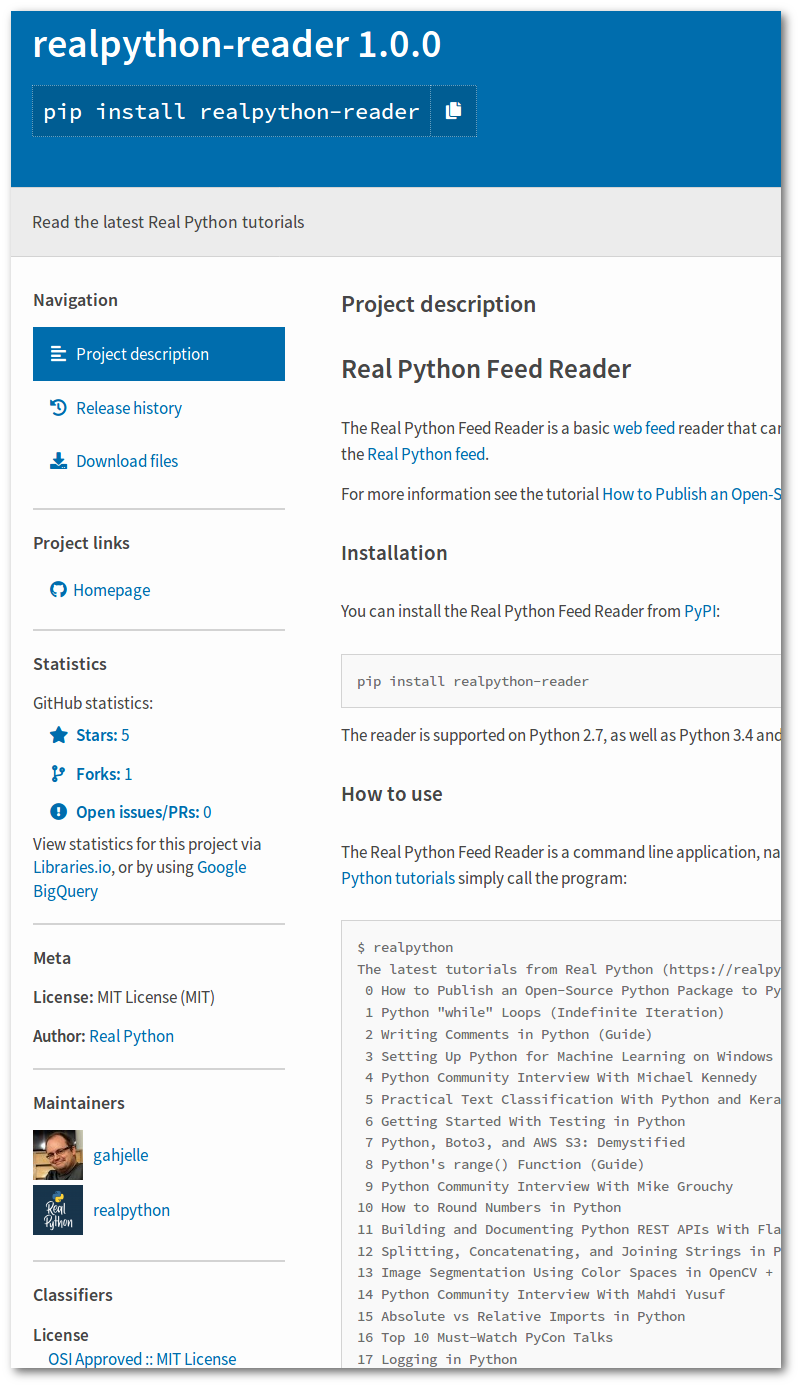

####Специфікація залежностей пакунка

Якщо робота пакунка залежить від інших пакункув, бібліотек, модулів, що не входять у стандартну бібліотеку то ці залежності потрібно вказати у файлі *pyproject.toml*. Пакунок *reader* залежить від *feedparser*, *html2text*, та *tomli*

In [ ]:
dependencies = [
    "feedparser >= 5.2.0",
    "html2text",
    'tomli; python_version < "3.11"',
]

у спеціфікації залежностей додатково вказують версії потрібних пакунків.

Можна використовувати додаткові засоби для роботи з залежностями. Наприклад, пакунок *pip-tools*

In [ ]:
python -m pip install pip-tools

*pip-compile* дозволяє згенерувати файл *requirements.txt*

In [ ]:
pip-compile pyproject.toml

*pip-sync* встановлює всі потрібні залежності

In [ ]:
pip-sync

файл *requirements.txt* для поточного середовища можна згенерувати за допомогою *pip*

In [ ]:
pip freeze > requirements.txt

Якщо наявний файл *requirements.txt* то можна встановити всі вказані в ньому пакунки

In [ ]:
pip install -r requirements.txt

####Встановлення програми локально

Для використання цієї програми її потрібно встановити. Програма чужа, невідомо чи буде в подальшому використовуватися, цей код потрібен для експериментів. Встановлюємо у віртуальне середовище.

Віртуальне середовище дозволяє відокремити проєкт від оточуючого середовища. https://docs.python.org/3/library/venv.html https://realpython.com/python-virtual-environments-a-primer/

In [ ]:
!pip install virtualenv

In [ ]:
!sudo apt install python3.12-venv

In [ ]:
!python -m venv /path/to/new/virtual/environment

Створюємо віртуальне середовище та активуємо його

In [ ]:
!python -m venv week_12

In [ ]:
!source week_12/bin/activate

Встановлюємо пакунок локально та з можливістю його редагувати. Пакунок буде встановлено як і всі пакунки в теку site-packages/folder. Прапорці *-e* та *.* вказують, що інсталяція редагована та шлях до pyproject.toml файла.

In [ ]:
!cd reader-master

In [ ]:
(week_12) $ python -m pip install -e .

Тепер можна запускати скрипт цього пакунка з будь якого місця на диску.

In [ ]:
!realpython

###Розміщення пакунка на PyPi

Для пакування та розміщення пакунка використовуються пакунки *build* та *twine*

In [ ]:
!python -m pip install build twine

####Створення дистрибутива

*build* дозволяє створити файли дистибутиву та архів вихідного коду

In [ ]:
!python -m build

Після створення архівів можна їх переглянути й пересвідчитися що весь потрібний вміст присутній.

*twine* дозволяє перевірити чи придатний дистрибутив для розміщення на PyPi

In [ ]:
!twine check dist/*

Для розміщення дистрибутива на PyPi також використовується *twine*. Розміщення буде зроблено не на реальному PyPi а на тестовому TestPyPi.

In [ ]:
twine upload -r testpypi dist/*

Розміщення завершиться помилкою бо пакунок з таким ім'ям вже розміщено. Потрібно змінити ім'я пакунку в конфігурації та повторити створення дистрибутиву та розміщення.

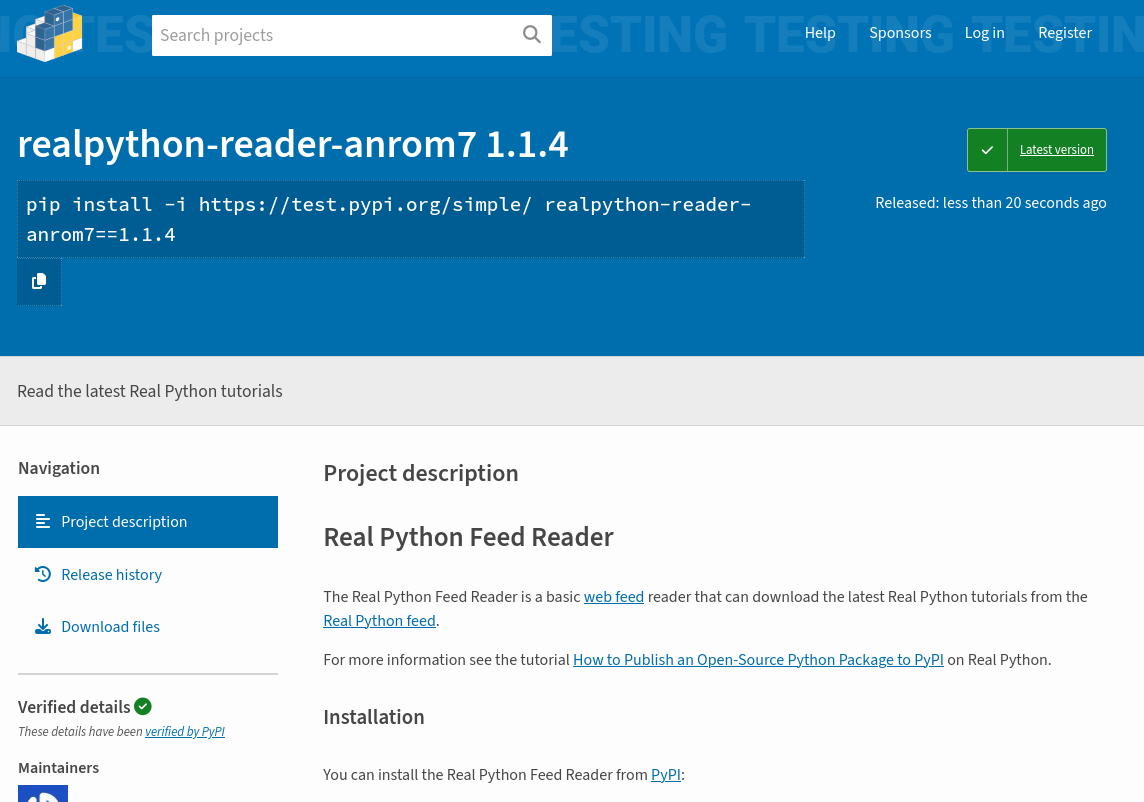

####Встановлення пакунка з дистрибутива

Для перевірки дистрибутива вартує створити нове віртуальне середовище, спробувати встановити пакунок та перевірити його працездатність

In [ ]:
!python -m pip install -i https://test.pypi.org/simple realpython-reader-anrom7

In [ ]:
!realpython

###Alternative Packaging Tools

Poetry
https://python-poetry.org/

Flit https://flit.readthedocs.io/en/latest/index.xhtml.

###Distributing to End Users

Замість pip та Pypi використовують різноманітні інструменти

PEX

Freezers

PyInstaller

PyOxidizer

py2app

cx_Freeze

fman Build System

Nuitka

Images and Containers

*   Flatpak
*   Snapcraft
*   AppImage
*   Docker

###Література

1. https://packaging.python.org/en/latest/guides/distributing-packages-using-setuptools/
2. https://packaging.python.org/en/latest/tutorials/packaging-projects/
3. https://realpython.com/pypi-publish-python-package
4. Dead Simple Python, Chapter 18 Packaging and Distribution